In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
data=pd.read_csv("C:/Users/Computer/Downloads/temperature_data.csv")

In [5]:
data

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


# preprocessing

In [7]:
def preprocess_inputs(df):
    df=df.copy()
    
    df=df.drop('profile_id', axis=1)
    
    y=df['pm'].copy()
    X=df.drop('pm', axis=1).copy()
    
    scaler=StandardScaler()
    X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    
    return X, y

In [8]:
X, y= preprocess_inputs(data)

In [9]:
X

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.753416 -1.120454  0.323842 -1.289164    -1.214600 -0.247367   
1      -0.772669 -1.119032  0.325575 -1.288994    -1.214601 -0.246316   
2      -0.784378 -1.118693  0.328689 -1.293119    -1.214600 -0.246615   
3      -0.782408 -1.118776  0.329619 -1.293150    -1.214602 -0.245818   
4      -0.775467 -1.118787  0.331128 -1.294413    -1.214601 -0.245883   
...          ...       ...       ...       ...          ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541    -1.214600 -0.252836   
998066 -0.045245  0.314537  0.327616 -1.242071    -1.214609 -0.252836   
998067 -0.038711  0.301961  0.326859 -1.238277    -1.214602 -0.252836   
998068 -0.035774  0.296640  0.326900 -1.240924    -1.214604 -0.252836   
998069 -0.040173  0.307199  0.326743 -1.238017    -1.214603 -0.252836   

             i_d       i_q  stator_yoke  stator_tooth  stator_winding  
0       1.024560 -0.243174    -1.830112     -2.064767       -2.017442  
1       1.024497 -0.243146    -1.829659     -2.063483       -2.017040  
2       1.024435 -0.243132    -1.829091     -2.062697       -2.016752  
3       1.027836 -0.244271    -1.829024     -2.061760       -2.017041  
4       1.026797 -0.243925    -1.829189     -2.061418       -2.017555  
...          ...       ...          ...           ...             ...  
998065  1.024130 -0.243036     1.016892      0.838630        0.499487  
998066  1.024135 -0.243049     1.011746      0.836983        0.499041  
998067  1.024178 -0.243015     1.001246      0.836481        0.497425  
998068  1.024134 -0.243041     0.997502      0.833048        0.495337  
998069  1.024128 -0.243036     0.985520      0.830588        0.494136  

[998070 rows x 11 columns]

In [10]:
y

0        -2.522071
1        -2.522418
2        -2.522673
3        -2.521639
4        -2.521900
            ...   
998065    0.429853
998066    0.429751
998067    0.429439
998068    0.429558
998069    0.429166
Name: pm, Length: 998070, dtype: float64

***EDA***

In [11]:
eda_df= pd.concat([X, y],axis=1).copy()

In [12]:
eda_df.describe()

ambient       coolant           u_d           u_q   motor_speed  \
count  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05   
mean  -8.710848e-14  3.311537e-14 -5.435962e-15  2.790820e-16  3.734451e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.629364e+00 -1.430606e+00 -1.663685e+00 -1.851460e+00 -1.363518e+00   
25%   -5.996013e-01 -1.040127e+00 -8.329068e-01 -9.195578e-01 -9.443957e-01   
50%    2.719319e-01 -1.814697e-01  2.633206e-01 -9.390939e-02 -1.337459e-01   
75%    6.953605e-01  6.444250e-01  3.544629e-01  8.563201e-01  8.588639e-01   
max    2.991585e+00  2.637919e+00  2.274782e+00  1.795006e+00  2.028007e+00   

             torque           i_d           i_q   stator_yoke  stator_tooth  \
count  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05   
mean  -5.697083e-13  2.613170e-15  9.983176e-16 -1.524101e-14  1.158428e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -3.349634e+00 -3.255192e+00 -3.345431e+00 -1.833374e+00 -2.064767e+00   
25%   -2.641375e-01 -7.631070e-01 -2.546066e-01 -7.470911e-01 -7.600494e-01   
50%   -1.842995e-01  2.081015e-01 -1.872727e-01 -5.777424e-02  7.295650e-03   
75%    5.516585e-01  1.008947e+00  5.035055e-01  6.960052e-01  7.747592e-01   
max    3.026641e+00  1.055957e+00  2.923484e+00  2.445984e+00  2.329815e+00   

       stator_winding             pm  
count    9.980700e+05  998070.000000  
mean    -6.861447e-15      -0.004396  
std      1.000001e+00       0.995686  
min     -2.019386e+00      -2.631991  
25%     -7.228854e-01      -0.672308  
50%      1.048858e-02       0.094367  
75%      7.308067e-01       0.680691  
max      2.662129e+00       2.917456

<Figure size 1152x1152 with 0 Axes>

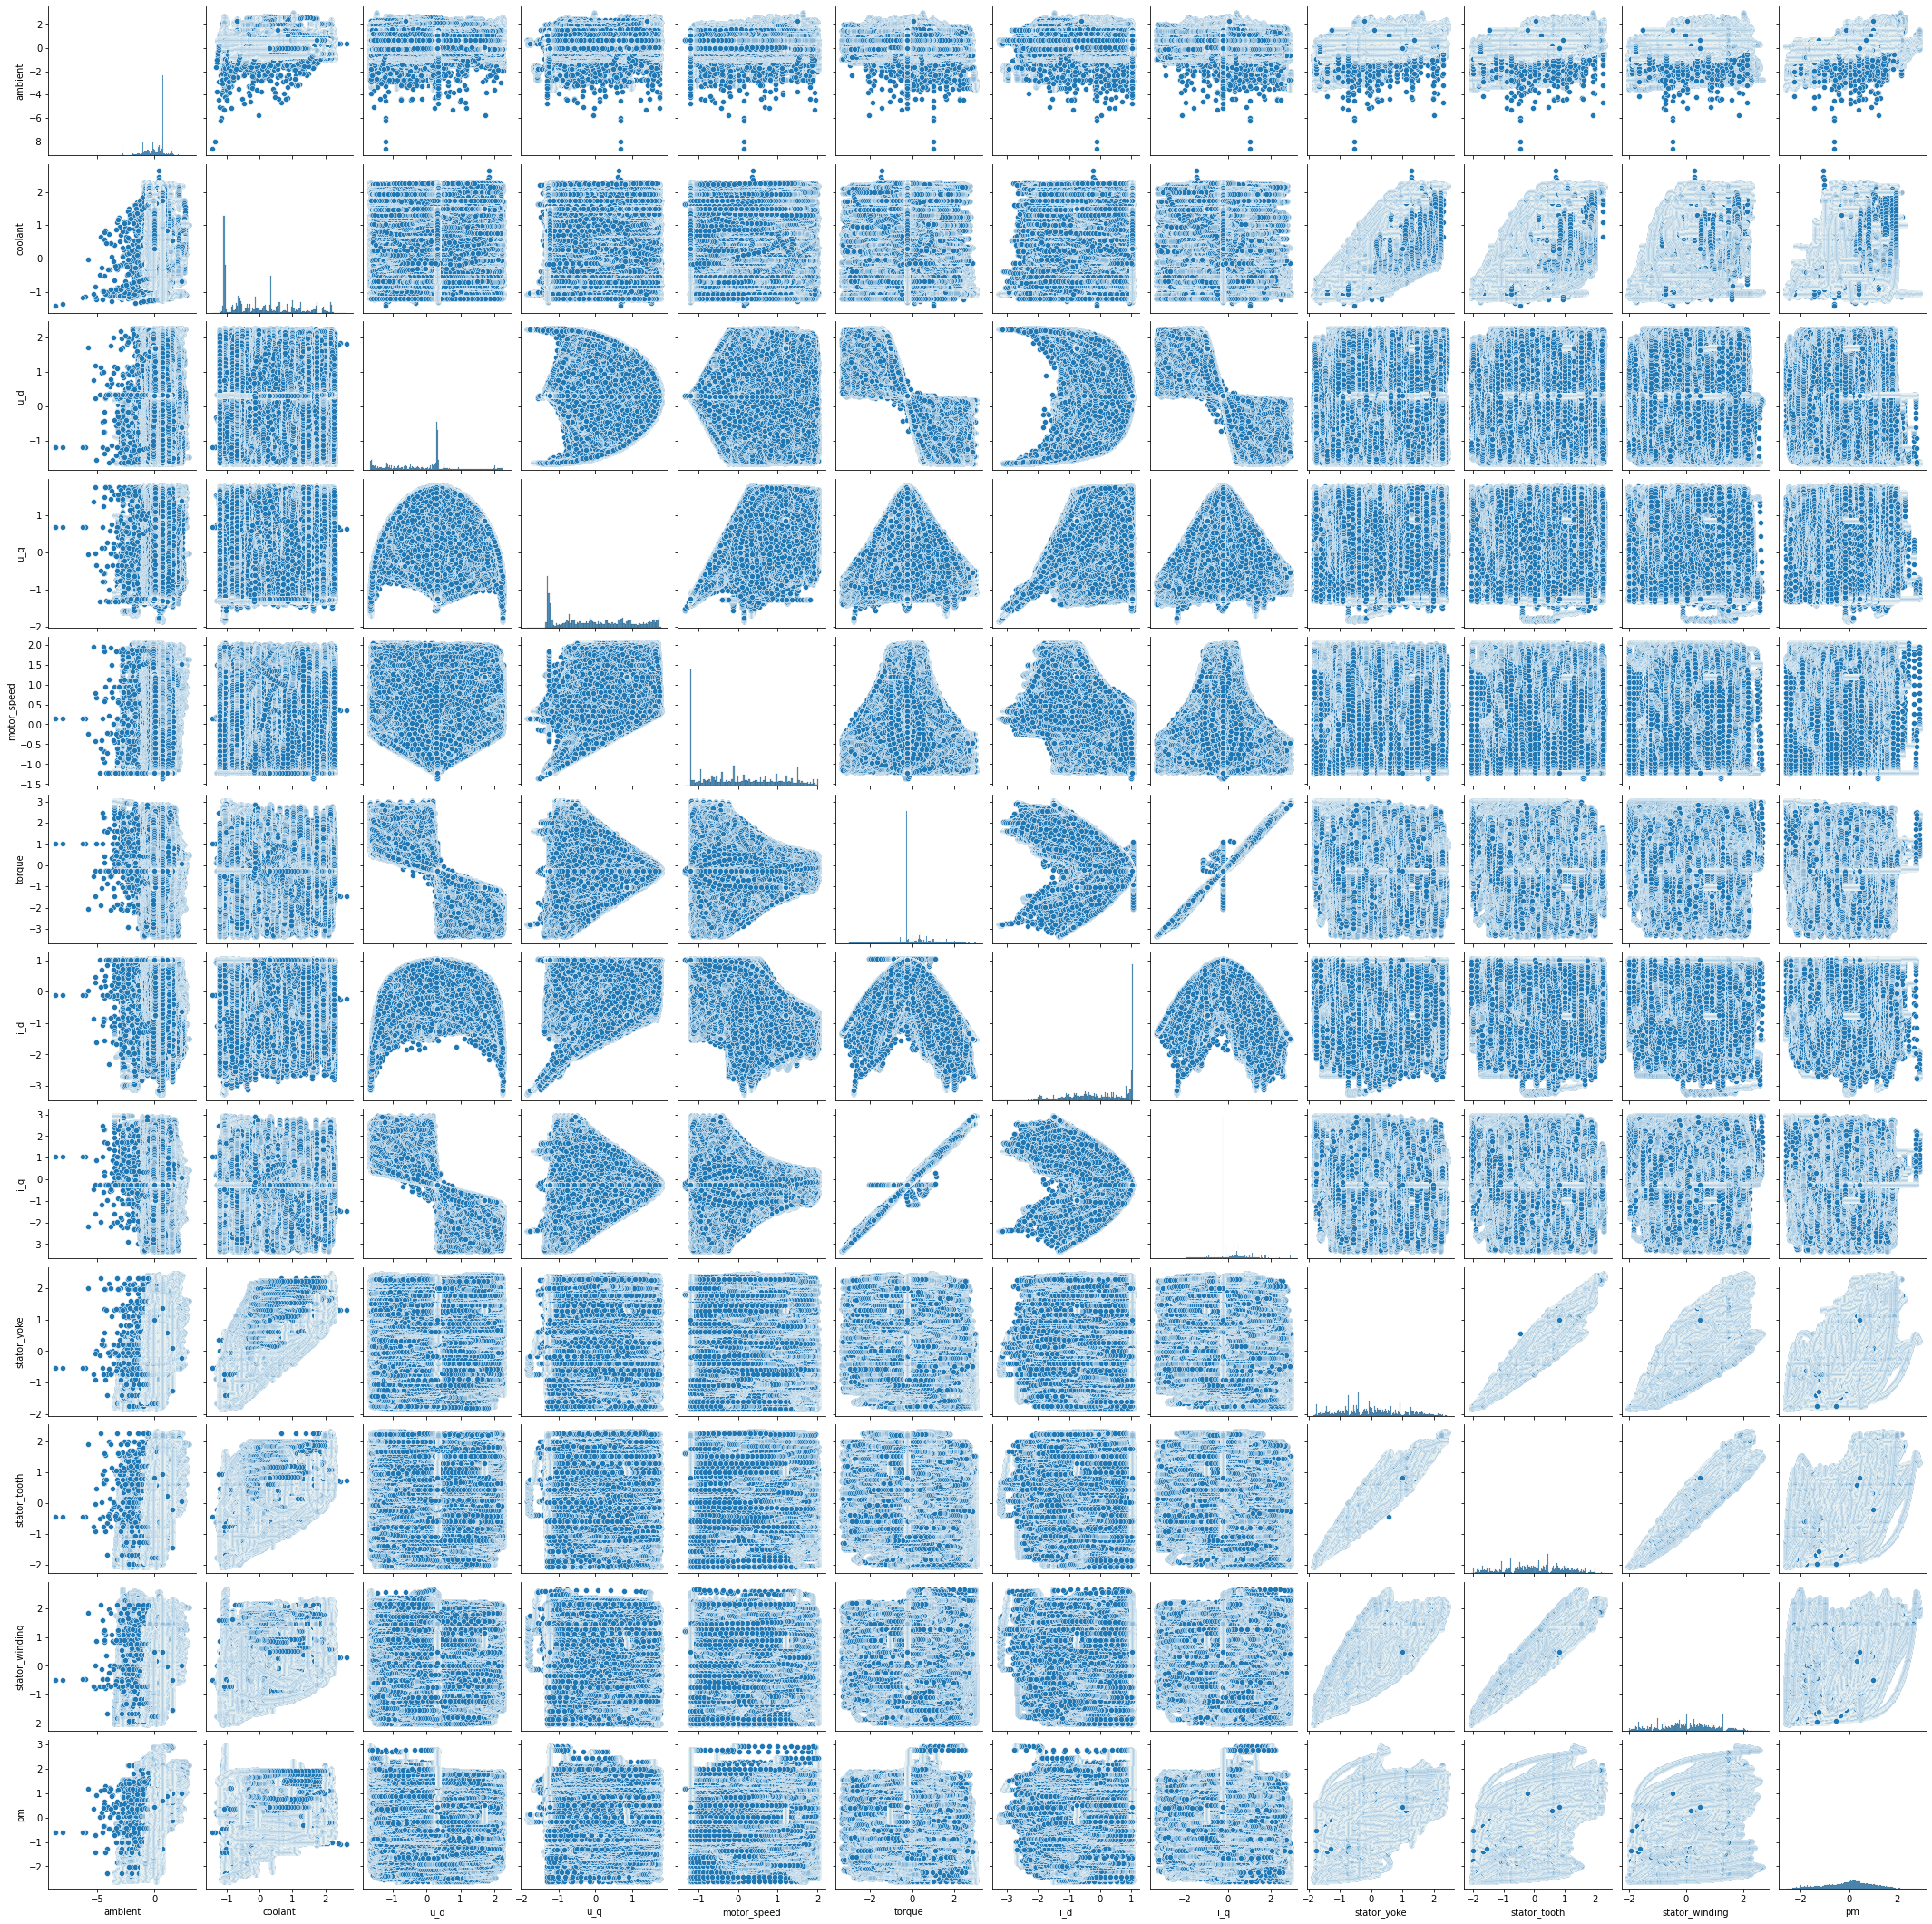

In [13]:
plt.figure(figsize=(16,16))
sns.pairplot(eda_df)
plt.show()

In [14]:
#EDA using Dtale Library:

In [15]:
import dtale

In [16]:
dtale.show(data)

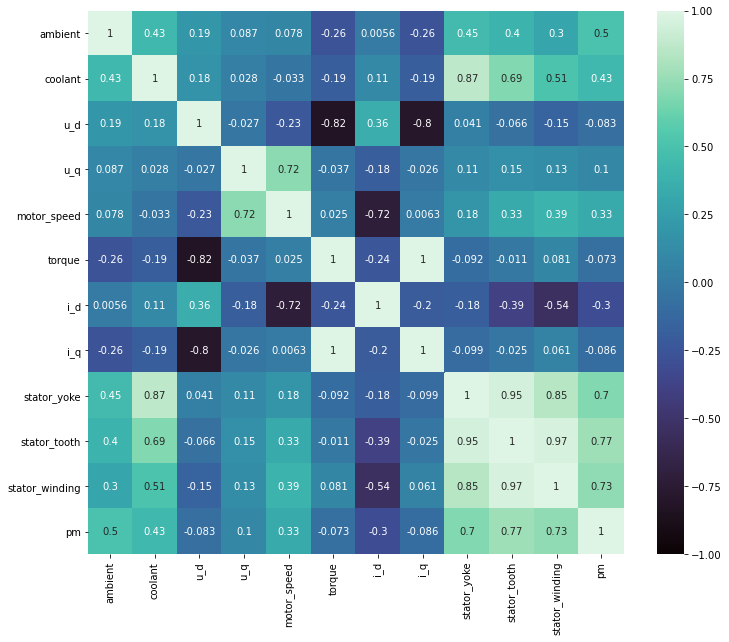

In [17]:
corr=eda_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.show()

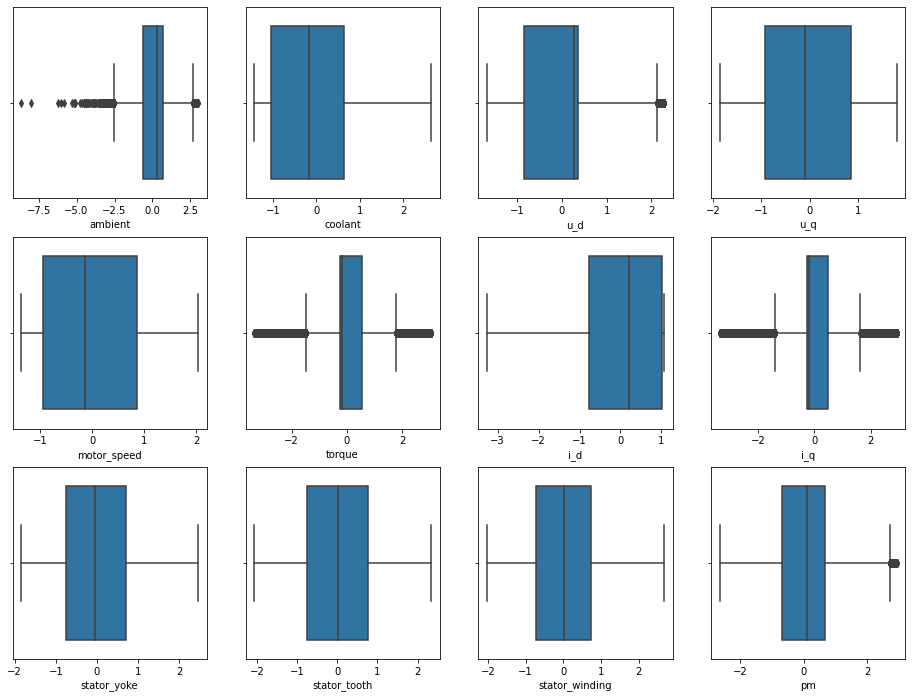

In [18]:
plt.figure(figsize=(16,12))
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])
plt.show()

 ***DETECTING OUTLIERS FROM BOXPLOT***

In [19]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((eda_df < (Q1 - 1.5 * IQR)) |(eda_df > (Q3 + 1.5 * IQR))).sum()

ambient            38738
coolant                0
i_d                    0
i_q               148799
motor_speed            0
pm                  1501
profile_id             0
stator_tooth           0
stator_winding         0
stator_yoke            0
torque            127712
u_d                18013
u_q                    0
dtype: int64

***REMOVING OUTLIERS***

In [20]:
eda_no_df = eda_df[~((eda_df < (Q1 - 1.5 * IQR)) |(eda_df > (Q3 + 1.5 * IQR))).any(axis=1)]
eda_no_df.shape

(814515, 12)

***BOXPLOT WITHOUT OUTLIERS***

<AxesSubplot:>

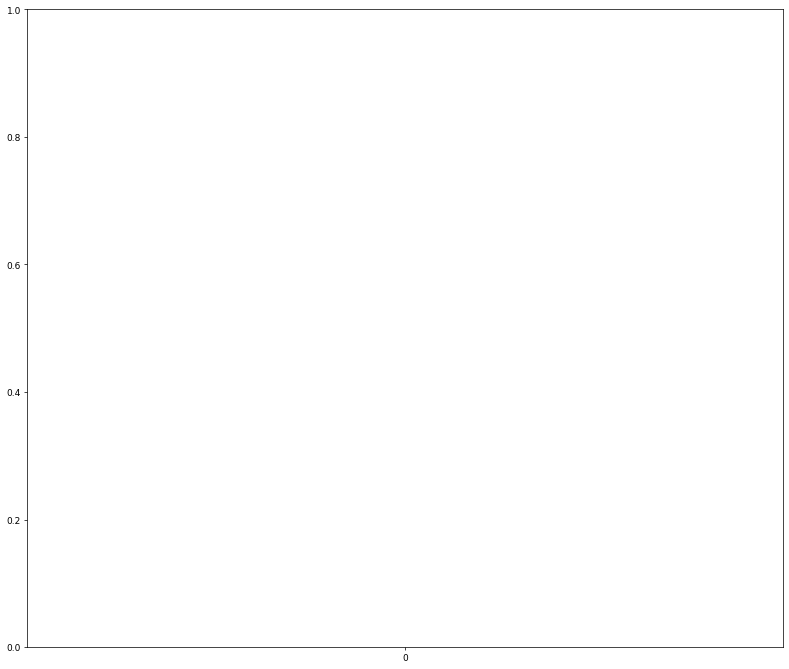

In [21]:
plt.figure(figsize = (15, 13), dpi = 65)
sns.boxplot(eda_df = eda_no_df[eda_no_df.columns[:12]], palette = 'PuBu', linewidth = 0.9)

# Extract the independent (input) and dependent (output) variable 

In [22]:
df=eda_df.copy()

In [23]:
# extracting independent variable
X =df.iloc[:,:-1].values
# extracting dependent variable
Y =df.iloc[:,-1].values 
print(X.shape)
print(Y.shape)

(998070, 11)
(998070,)


### Splitting the dataset into the Training and Testing sets 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100) 
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(698649, 11) (698649,)
(299421, 11) (299421,)


# **Normalization of dataset**

In [25]:
# bringing all the features into same range to perform valid predictions
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # 0 : 1
X_train =mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)
print(X_train, X_test)

[[0.80355    0.18281015 0.68085054 ... 0.31944573 0.44423309 0.45571082]
 [0.73985455 0.20298835 0.81514817 ... 0.32864338 0.41999533 0.41564784]
 [0.61471535 0.09894517 0.05788557 ... 0.3356153  0.48280269 0.53397682]
 ...
 [0.598132   0.09161282 0.20567768 ... 0.23224553 0.32018746 0.3538598 ]
 [0.84343531 0.09628645 0.50561017 ... 0.13055987 0.15915635 0.15112749]
 [0.77020027 0.37858095 0.07793787 ... 0.50561395 0.61091284 0.59158583]] [[0.72149237 0.40897457 0.29943901 ... 0.50208823 0.56573182 0.57414773]
 [0.7555919  0.32179618 0.62671372 ... 0.43314547 0.48675039 0.45370097]
 [0.72860374 0.18157172 0.50169204 ... 0.14580596 0.14912528 0.11754541]
 ...
 [0.85111784 0.47025486 0.62791667 ... 0.76003161 0.85417074 0.83795095]
 [0.637144   0.25758407 0.36083629 ... 0.17864606 0.15919507 0.12534249]
 [0.75520089 0.1397005  0.05640685 ... 0.29885555 0.37847449 0.34240885]]


In [26]:
print(Y_train, Y_test)

[ 0.0364893 -0.479171  -0.2082343 ... -1.2216712  0.3270447  1.2016565] [ 0.4631098  -0.98074853  0.5109293  ...  1.6296465  -2.235904
 -0.02798202]


### Training dataset with Regression Models

Here, 4 regression models were used to predict the PM temperature:
1. Linear Regression Model
2. K-Nearest Neighbour Regressor 
3. XGBoost Regressor
4. AdaBoost Regressor

In [27]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

###Regression Model

In [28]:
l_reg = LinearRegression()
l_reg.fit(X_train,Y_train)

l_train_acc = (l_reg.score(X_train,Y_train))*100
l_test_acc = (l_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {l_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {l_test_acc}")

Train accuracy: 77.19304857585337
Test accuracy: 77.22411796101125


In [29]:
Y_pred = l_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(299421,) (299421,)


In [30]:
r2_l = r2_score(Y_test, Y_pred)*100
rms_l = sqrt(mean_squared_error(Y_test, Y_pred))
mae_l = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_l} %")
print(f"Root mean squared error is {rms_l}")
print(f"Mean absolute error is {mae_l}")

R^2 score of model is 77.22411796101125 %
Root mean squared error is 0.47551021290868295
Mean absolute error is 0.3614983257914487


###Performing KFold Cross-Validation (CV) 

In [31]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(l_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_l = l_reg.predict(X_test)
r2_l_cv = sklearn.metrics.r2_score(Y_test, Y_pred_cv_l)*100
print(f'R^2 Score: {r2_l_cv} %')

Score Array list: [0.77045933 0.77498748 0.77094462 0.77574328 0.76925406 0.77028857
 0.77225404 0.77068216 0.77191722 0.77263063]


R^2 Score: 77.22411796101125 %


###Evaluation table

In [32]:
calculation = pd.DataFrame(np.c_[Y_test,l_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

Original Temperature  Predicted Temperature
0              0.463110              -0.283924
1             -0.980749               0.013910
2              0.510929              -0.812700
3             -1.260174              -1.488477
4              1.267661               1.037637

###Visualizing the test results 

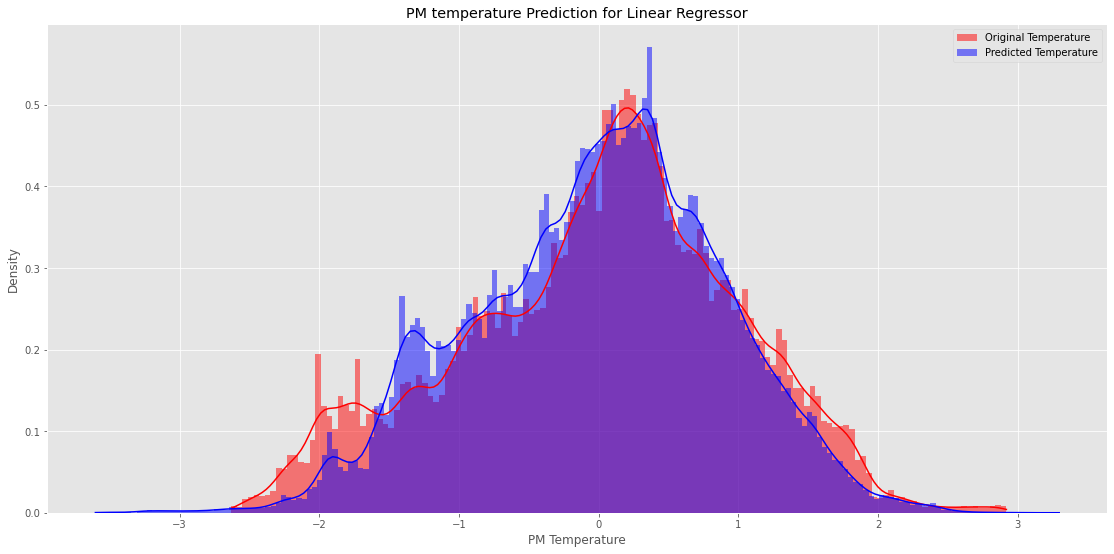

In [33]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Linear Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### K-Nearest Neighbour Regressor 

In [38]:
k_reg = KNeighborsRegressor(n_neighbors=10,p=2,metric='minkowski')
k_reg.fit(X_train,Y_train)

k_train_acc = (k_reg.score(X_train,Y_train))*100
k_test_acc = (k_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")

Train accuracy: 98.89661264482243
Test accuracy: 95.06648440951335


In [39]:
Y_pred = k_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(299421,) (299421,)


In [40]:
r2_k = r2_score(Y_test, Y_pred)*100
rms_k = sqrt(mean_squared_error(Y_test, Y_pred))
mae_k = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_k} %")
print(f"Root mean squared error is {rms_k}")
print(f"Mean absolute error is {mae_k}")

R^2 score of model is 95.06648440951335 %
Root mean squared error is 0.22130972530349896
Mean absolute error is 0.10120922324979995


###Performing K-FOLD Cross Validation

In [41]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
k_reg = KNeighborsRegressor()
k_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(k_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_k = k_reg.predict(X_test)
r2_k_cv = sklearn.metrics.r2_score(Y_test, Y_pred_cv_k)*100
print(f'R^2 Score: {r2_k_cv} %')

Score Array list: [0.99000572 0.98961994 0.98994441 0.98970086 0.98934982 0.98944191
 0.99012551 0.98915341 0.98966758 0.98979267]


R^2 Score: 95.40527092594961 %


###Evaluation and Visualization

In [42]:
calculation = pd.DataFrame(np.c_[Y_test,k_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

Original Temperature  Predicted Temperature
0              0.463110               0.398646
1             -0.980749              -0.986900
2              0.510929               0.494875
3             -1.260174              -1.262803
4              1.267661               1.252173

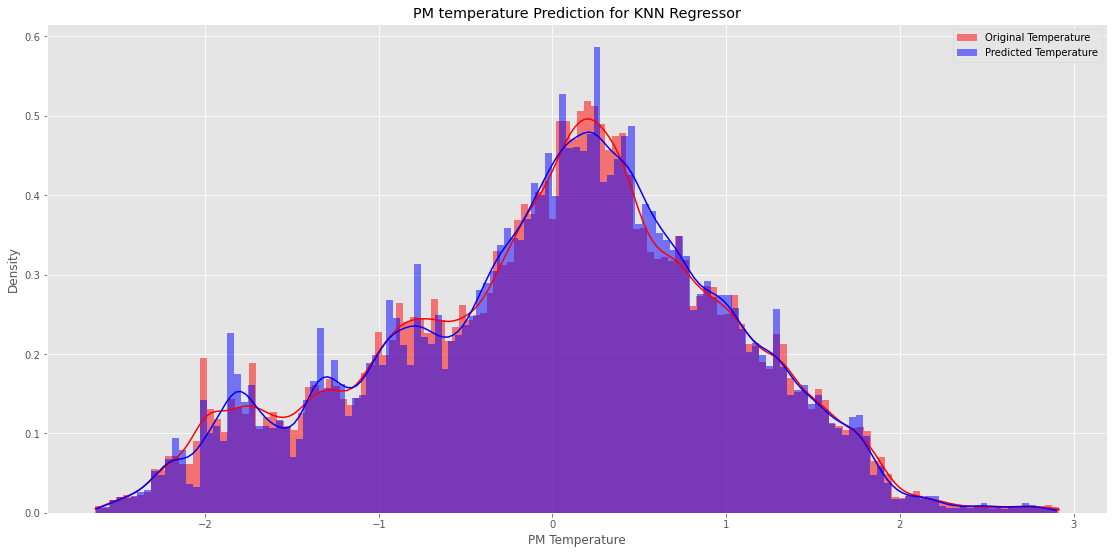

In [43]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for KNN Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

###XGBOOST Regressor

In [44]:
x_reg = XGBRegressor()
x_reg.fit(X_train,Y_train)

x_train_acc = (x_reg.score(X_train,Y_train))*100
x_test_acc = (x_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {x_train_acc}")
print(f"Test accuracy: {x_test_acc}")

Train accuracy: 96.87448815343983
Test accuracy: 86.33272999018264


In [45]:
Y_pred = x_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(299421,) (299421,)


In [46]:
r2_x = r2_score(Y_test, Y_pred)*100
rms_x = sqrt(mean_squared_error(Y_test, Y_pred))
mae_x = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_x} %")
print(f"Root mean squared error is {rms_x}")
print(f"Mean absolute error is {mae_x}")

R^2 score of model is 86.33272999018264 %
Root mean squared error is 0.3683520861736096
Mean absolute error is 0.2770772914671761


###Performing K-FOLD Cross Validation

In [47]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
x_reg = XGBRegressor()
x_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(x_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_x = x_reg.predict(X_test)
r2_x_cv = sklearn.metrics.r2_score(Y_test, Y_pred_cv_x)*100
print(f'R^2 Score: {r2_x_cv} %')

Score Array list: [0.96740598 0.9664502  0.96896853 0.96978504 0.96691147 0.96608514
 0.96665803 0.96743252 0.96758383 0.9670226 ]


R^2 Score: 86.33272999018264 %


###Evaluation and Visualization

In [48]:
calculation = pd.DataFrame(np.c_[Y_test,x_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

Original Temperature  Predicted Temperature
0              0.463110               0.350873
1             -0.980749              -0.322886
2              0.510929              -0.598367
3             -1.260174              -1.300431
4              1.267661               1.458098

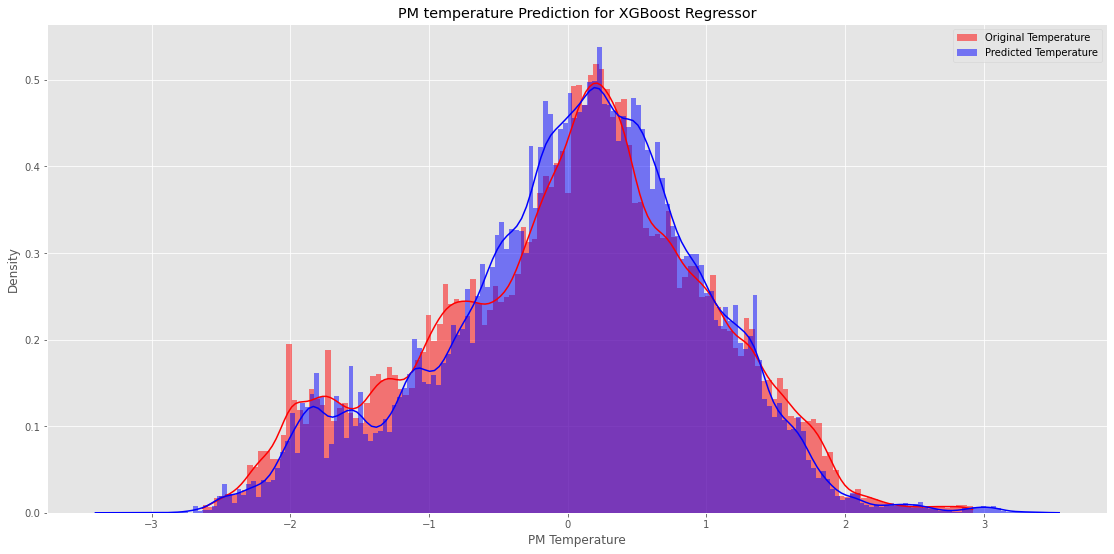

In [49]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for XGBoost Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### AdaBoost Regressor 

In [50]:
dtree = DecisionTreeRegressor()
a_reg = AdaBoostRegressor(n_estimators=100, base_estimator=dtree,learning_rate=1)
a_reg.fit(X_train, Y_train)

a_train_acc = (a_reg.score(X_train,Y_train))*100
a_test_acc = (a_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {a_train_acc}")
print(f"Test accuracy: {a_test_acc}")

Executing shutdown due to inactivity...


2022-03-24 18:54:04,685 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-24 18:54:14,805 - INFO     - Executing shutdown...


Train accuracy: 99.99998398296871
Test accuracy: 89.8007345631932


In [51]:
Y_pred = a_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(299421,) (299421,)


In [52]:
r2_a = r2_score(Y_test, Y_pred)*100
rms_a = sqrt(mean_squared_error(Y_test, Y_pred))
mae_a = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_a} %")
print(f"Root mean squared error is {rms_a}")
print(f"Mean absolute error is {mae_a}")

R^2 score of model is 89.8007345631932 %
Root mean squared error is 0.31820477607803077
Mean absolute error is 0.15663216068171645


###Performing KFold Cross-Validation (CV) 

In [53]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
a_reg = AdaBoostRegressor()
a_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(a_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_a = a_reg.predict(X_test)
r2_a_cv = sklearn.metrics.r2_score(Y_test, Y_pred_cv_a)*100
print(f'R^2 Score: {r2_a_cv} %')

Score Array list: [0.68972057 0.69230384 0.69042526 0.69638163 0.69543047 0.69444327
 0.68741525 0.68591218 0.69389642 0.69609297]


R^2 Score: 68.53464824994467 %


###Evaluation and Visualization

In [54]:
calculation = pd.DataFrame(np.c_[Y_test,a_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

Original Temperature  Predicted Temperature
0              0.463110               0.046061
1             -0.980749              -0.136371
2              0.510929              -0.616348
3             -1.260174              -0.939447
4              1.267661               0.900103

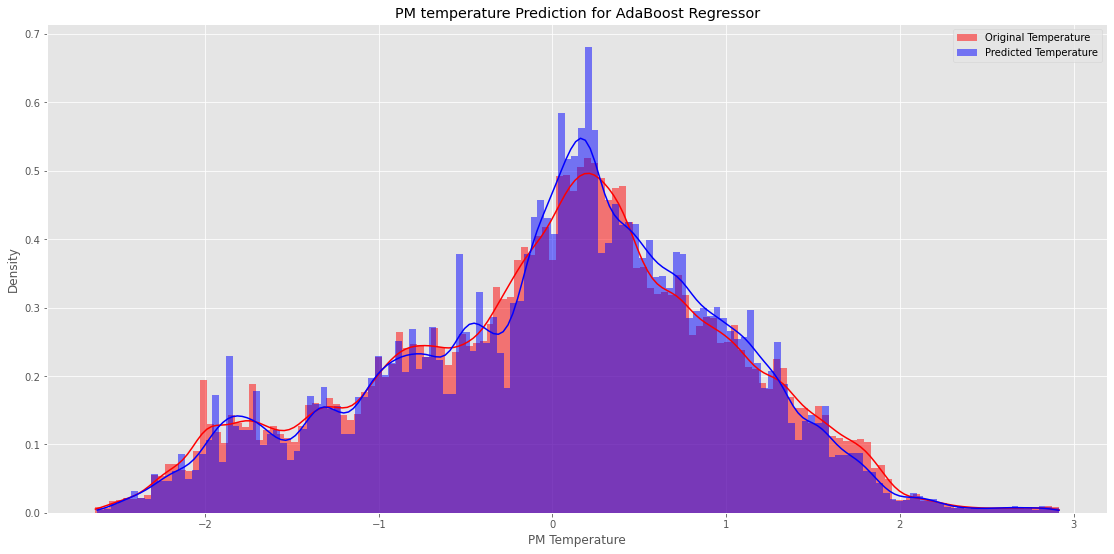

In [55]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for AdaBoost Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

###Evaluation Table

In [56]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','XGBoost Regressor', 
             'AdaBoost Regressor',  'K-Nearest Neighbours Regressor'],
    'Training Accuracy' : [l_train_acc, x_train_acc, a_train_acc, k_train_acc],
    'Testing Auracy' : [l_test_acc, x_test_acc, a_test_acc, k_test_acc],
    'RMS Score' : [rms_l, rms_x, rms_a, rms_k],
    'MAE Score' : [mae_l, mae_x, mae_a, mae_k],
    'R^2 Score': [ r2_l, r2_x, r2_a, r2_k],
    'CV R^2 Score': [r2_l_cv, r2_x_cv, r2_a_cv, r2_k_cv]
})

models.sort_values(by = ['Training Accuracy', 'Testing Auracy', 'RMS Score', 'MAE Score', 'R^2 Score','CV R^2 Score'], 
                   ascending = True)

Algorithm  Training Accuracy  Testing Auracy  \
0               Linear Regression          77.193049       77.224118   
1               XGBoost Regressor          96.874488       86.332730   
3  K-Nearest Neighbours Regressor          98.896613       95.066484   
2              AdaBoost Regressor          99.999984       89.800735   

   RMS Score  MAE Score  R^2 Score  CV R^2 Score  
0   0.475510   0.361498  77.224118     77.224118  
1   0.368352   0.277077  86.332730     86.332730  
3   0.221310   0.101209  95.066484     95.405271  
2   0.318205   0.156632  89.800735     68.534648

###Camparison Graph
###Algorithm vs. R^2 Score  

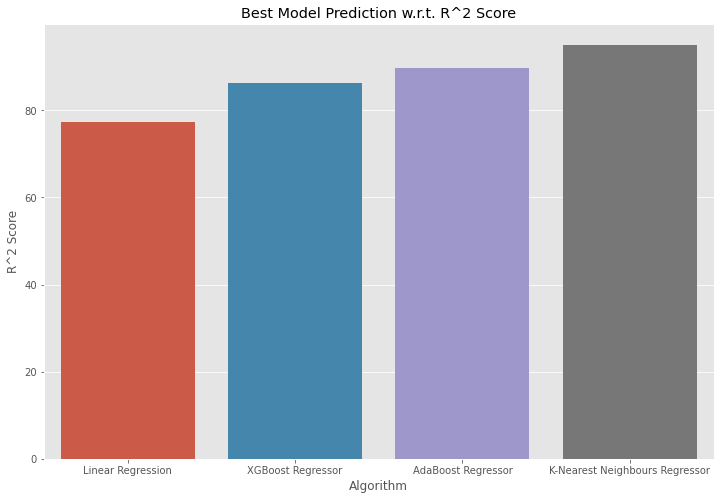

In [57]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

###Algorithm vs. CV R^2 Score  

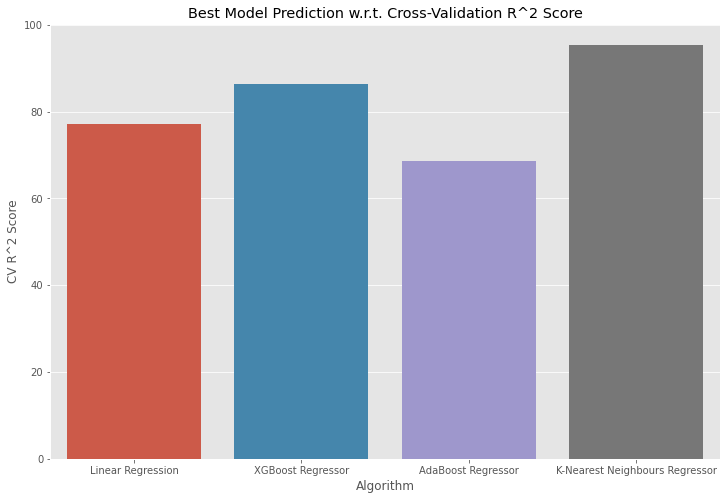

In [58]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='CV R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. Cross-Validation R^2 Score") 
plt.show()

###Algorithm vs. Training Accuracy

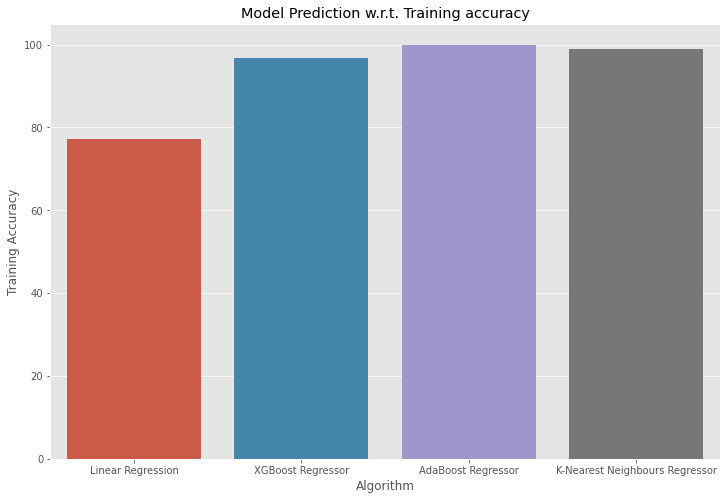

In [59]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='Training Accuracy',data=models)
plt.title("Model Prediction w.r.t. Training accuracy")
plt.show()

###Algorithm vs. Testing Accuracy 

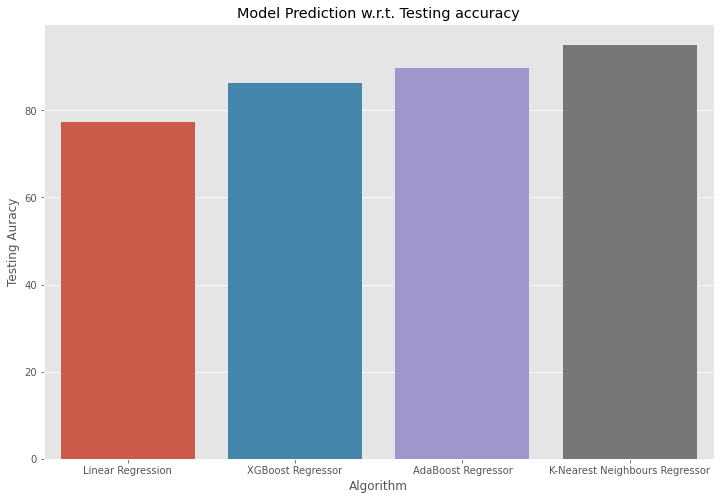

In [60]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='Testing Auracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()

In [2]:
#Save your Model :

In [62]:
import joblib

In [63]:
joblib.dump(k_reg,r"C:\Flask\models\KNNRegressor.sav")

['C:\\Flask\\models\\KNNRegressor.sav']

In [64]:
model = joblib.load(r"C:\Flask\models\KNNRegressor.sav")

In [69]:
model.predict(X_test)

array([ 0.39864563, -0.98690014,  0.49487458, ...,  1.62911244,
       -2.2174048 , -0.01113111])